In [1]:
import tensorflow as tf

# Check TensorFlow version
tf.__version__

'2.3.1'

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/test'

In [4]:
# Import ResNet50 library as shown below and add preprocessing layer to the front
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 25s 0us/step


In [5]:
# Don't train existing weights as they are already present in ResNet50
for layer in resnet.layers:
    layer.trainable = False

In [21]:
# useful for getting number of output classes
folders = glob('data/train/*')

In [22]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [23]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [24]:
# view the structure of the model
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [28]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [29]:
# Fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
61/61 [==============================] - 212s 3s/step - loss: 3.6565 - accuracy: 0.3629 - val_loss: 1.8735 - val_accuracy: 0.5556
Epoch 2/10
61/61 [==============================] - 199s 3s/step - loss: 1.0918 - accuracy: 0.5505 - val_loss: 1.0217 - val_accuracy: 0.7222
Epoch 3/10
61/61 [==============================] - 203s 3s/step - loss: 1.0224 - accuracy: 0.5951 - val_loss: 1.1639 - val_accuracy: 0.6111
Epoch 4/10
61/61 [==============================] - 226s 4s/step - loss: 0.9754 - accuracy: 0.6340 - val_loss: 0.8766 - val_accuracy: 0.7222
Epoch 5/10
61/61 [==============================] - 203s 3s/step - loss: 0.8500 - accuracy: 0.6535 - val_loss: 1.1741 - val_accuracy: 0.6667
Epoch 6/10
61/61 [==============================] - 196s 3s/step - loss: 0.8612 - accuracy: 0.6715 - val_loss: 0.8188 - val_accuracy: 0.6667
Epoch 7/10
61/61 [==============================] - 213s 3s/step - loss: 0.7506 - accuracy: 0.6873 - val_loss: 1.1711 - val_accuracy: 0.6111
Epoch 8/10
61

In [30]:
import matplotlib.pyplot as plt

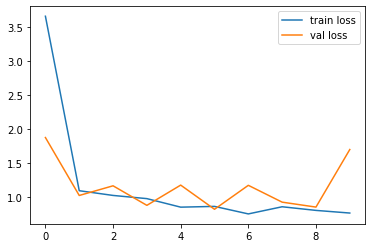

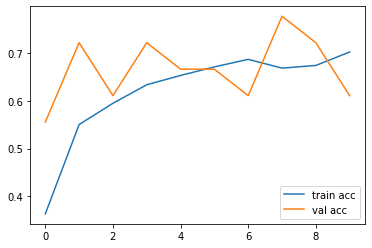

<Figure size 432x288 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

In [ ]:
img=image.load_img('data/Test/Coffee/download (2).jpg',target_size=(224,224))